##Hotdog detection code

This code uses NN to distinguish foods as being hotdog or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
import random
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.data import AUTOTUNE
from tensorflow.keras.layers import Rescaling, Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
train_datadir = '/content/drive/MyDrive/hotdog-nothotdog/train/'
test_datadir = '/content/drive/MyDrive/hotdog-nothotdog/test/'
categories = ['nothotdog', 'hotdog' ]

Look at the images at each category

<class 'numpy.ndarray'>
(299, 299, 3)
268203


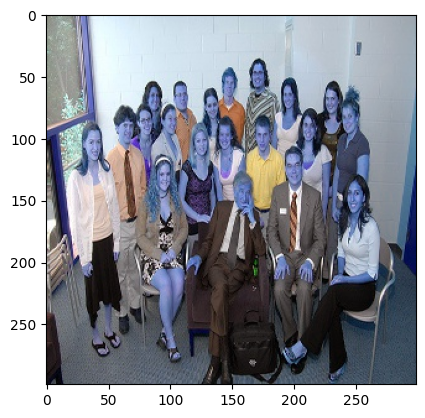

<class 'numpy.ndarray'>
(299, 299, 3)
268203


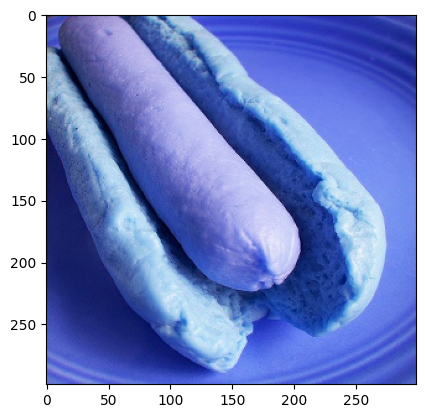

In [4]:
for category in categories:
    path = os.path.join(train_datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        print(type(img_array))
        print(img_array.shape)
        print(img_array.size)
        plt.imshow(img_array)
        plt.show()
        break

create X and y variables from the train and test data

In [33]:
# specify the size of the image you want to use
img_size = 100
saved_files = True

In [34]:
if not saved_files:
  # training images
  training_data = []
  for i in range(len(categories)):
    category = categories[i]
    path = os.path.join(train_datadir, category)
    print(path)
    print(type(path))
    num_images = len(os.listdir(path))
    print(f'total {category} images to read is {num_images}')
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array, i])
  #     print(f'=> importing {i} out of {num_images} images')
  # save files if it the the first time reading the data
  pickle.dump(training_data, open('/content/drive/MyDrive/Python_data_classes/projects_after_GA/imageclassification_hotdog/saved_files/training_data.pkl', "wb"))
else:
  training_data = pickle.load(open('/content/drive/MyDrive/Python_data_classes/projects_after_GA/imageclassification_hotdog/saved_files/training_data.pkl', "rb"))

In [35]:
if not saved_files:
  # test images
  test_data = []
  for i in range(len(categories)):
    category = categories[i]
    path = os.path.join(test_datadir, category)
    print(path)
    print(type(path))
    num_images = len(os.listdir(path))
    print(f'total {category} images to read is {num_images}')
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        test_data.append([new_array, i])
  #     print(f'=> importing {i} out of {num_images} images')
  # save files if it the the first time reading the data
  pickle.dump(test_data, open('/content/drive/MyDrive/Python_data_classes/projects_after_GA/imageclassification_hotdog/saved_files/test_data.pkl', "wb"))
else:
  test_data = pickle.load(open('/content/drive/MyDrive/Python_data_classes/projects_after_GA/imageclassification_hotdog/saved_files/test_data.pkl', "rb"))

In [8]:
print(test_data[0][0].shape)

(100, 100, 3)


Convert the lists into numpy arrays. Also, divide the training data into training and validation sets.

In [9]:
random.shuffle(training_data)
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X_train = np.array(X[:2400]).reshape(-1, img_size, img_size, 3)/255.
y_train = np.array(y[:2400])


In [10]:
X_val = np.array(X[2400:]).reshape(-1, img_size, img_size, 3)/255.
y_val = np.array(y[2400:])

In [ ]:
# test data
X = []
y = []
for features, label in test_data:
    X.append(features)
    y.append(label)
X_test = np.array(X).reshape(-1, img_size, img_size, 3)/255.
y_test = np.array(y)
print('test data shape')
print(X_test.shape)
print(y_test.shape)
X = []
y = []

test data shape
(644, 100, 100, 3)
(644,)


Build the model, compile it, and then run it.

In [ ]:
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2),
    Dropout(0.20),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.20),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.20),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.20),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.20),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss = 'bce',
              optimizer = 'adam',
              metrics = 'acc')

history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 128,
                    epochs = 80,
                    callbacks = EarlyStopping(patience = 8))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 conv2d_78 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 23, 23, 64)      

In [ ]:
batch_size = 32
img_height = 64
img_width = 64
color = 'grayscale'

In [ ]:
train_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/hotdog-nothotdog/train',
  validation_split=0.2,
  subset="training",
  seed=123,
#  color_mode = color,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [ ]:
val_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/hotdog-nothotdog/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
#  color_mode = color,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['hotdog', 'nothotdog']

In [ ]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

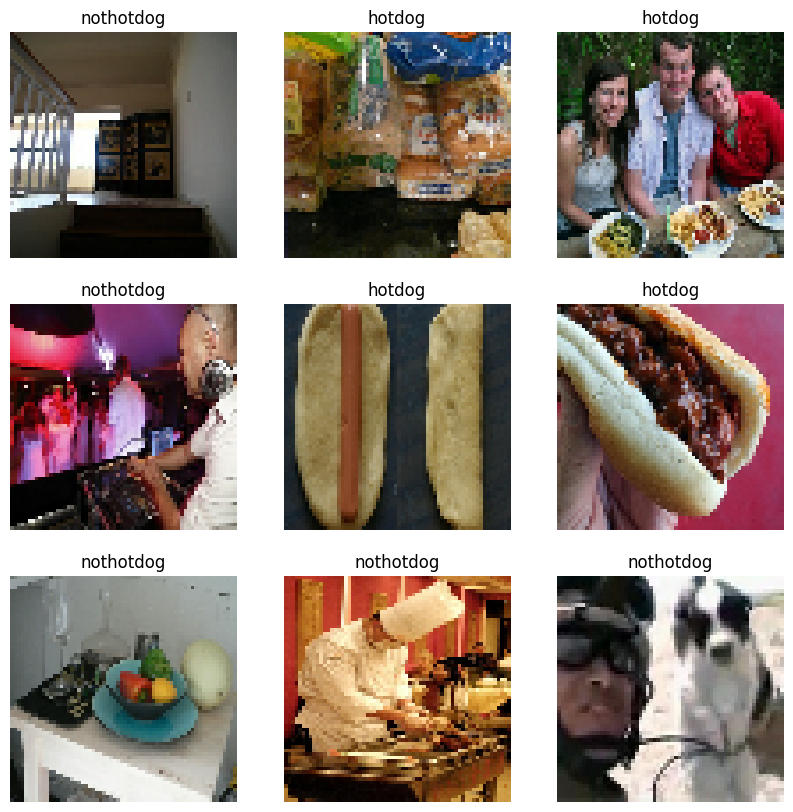

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
num_batches = 0
for image_batch, labels_batch in train_ds:
  num_batches +=1
  # print(image_batch.shape)
  # print(labels_batch.shape)
  # break
print(num_batches)

75


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.3),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/30
75/75 [==============================] - 11s 100ms/step - loss: 0.6715 - acc: 0.5871 - val_loss: 0.6340 - val_acc: 0.6650
Epoch 2/30
75/75 [==============================] - 9s 111ms/step - loss: 0.6125 - acc: 0.6658 - val_loss: 0.5967 - val_acc: 0.6817
Epoch 3/30
75/75 [==============================] - 9s 112ms/step - loss: 0.5867 - acc: 0.6954 - val_loss: 0.5908 - val_acc: 0.6967
Epoch 4/30
75/75 [==============================] - 8s 98ms/step - loss: 0.5676 - acc: 0.7004 - val_loss: 0.5961 - val_acc: 0.6783
Epoch 5/30
75/75 [==============================] - 8s 103ms/step - loss: 0.5559 - acc: 0.7154 - val_loss: 0.5714 - val_acc: 0.7200
Epoch 6/30
75/75 [==============================] - 10s 120ms/step - loss: 0.5161 - acc: 0.7471 - val_loss: 0.5597 - val_acc: 0.7250
Epoch 7/30
75/75 [==============================] - 10s 126ms/step - loss: 0.5107 - acc: 0.7517 - val_loss: 0.6136 - val_acc: 0.6583
Epoch 8/30
75/75 [==============================] - 10s 126ms/step - loss:

In [ ]:
num_classes = len(class_names)

model_simp1 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  BatchNormalization(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_simp1.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=30
history = model_simp1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/30
75/75 [==============================] - 2s 8ms/step - loss: 0.7062 - acc: 0.6208 - val_loss: 0.6736 - val_acc: 0.5500
Epoch 2/30
75/75 [==============================] - 0s 5ms/step - loss: 0.5505 - acc: 0.7163 - val_loss: 0.6660 - val_acc: 0.6233
Epoch 3/30
75/75 [==============================] - 0s 5ms/step - loss: 0.4821 - acc: 0.7617 - val_loss: 0.6326 - val_acc: 0.6850
Epoch 4/30
75/75 [==============================] - 0s 5ms/step - loss: 0.4087 - acc: 0.8183 - val_loss: 0.6251 - val_acc: 0.6217
Epoch 5/30
75/75 [==============================] - 0s 5ms/step - loss: 0.3455 - acc: 0.8533 - val_loss: 0.5855 - val_acc: 0.6883
Epoch 6/30
75/75 [==============================] - 0s 5ms/step - loss: 0.2781 - acc: 0.8896 - val_loss: 0.5783 - val_acc: 0.6933
Epoch 7/30
75/75 [==============================] - 0s 5ms/step - loss: 0.2216 - acc: 0.9229 - val_loss: 0.6216 - val_acc: 0.6667
Epoch 8/30
75/75 [==============================] - 0s 5ms/step - loss: 0.1769 - acc: 0.94

In [ ]:
# add more layers to the model
num_classes = len(class_names)

model2 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=30
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/30
75/75 [==============================] - 2s 8ms/step - loss: 0.6590 - acc: 0.6142 - val_loss: 0.5995 - val_acc: 0.6800
Epoch 2/30
75/75 [==============================] - 0s 6ms/step - loss: 0.6014 - acc: 0.6742 - val_loss: 0.5832 - val_acc: 0.6967
Epoch 3/30
75/75 [==============================] - 0s 6ms/step - loss: 0.5797 - acc: 0.7021 - val_loss: 0.5711 - val_acc: 0.7100
Epoch 4/30
75/75 [==============================] - 1s 8ms/step - loss: 0.5511 - acc: 0.7196 - val_loss: 0.5821 - val_acc: 0.7133
Epoch 5/30
75/75 [==============================] - 1s 7ms/step - loss: 0.5263 - acc: 0.7358 - val_loss: 0.5707 - val_acc: 0.7050
Epoch 6/30
75/75 [==============================] - 1s 7ms/step - loss: 0.4977 - acc: 0.7617 - val_loss: 0.5496 - val_acc: 0.7250
Epoch 7/30
75/75 [==============================] - 1s 7ms/step - loss: 0.4710 - acc: 0.7738 - val_loss: 0.5633 - val_acc: 0.7117
Epoch 8/30
75/75 [==============================] - 0s 6ms/step - loss: 0.4372 - acc: 0.80

Let us plot the data now.

In [ ]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

We have a big overfitting issue. Let us see what can be done for it.

In [ ]:
# add more layers to the model
num_classes = len(class_names)

model3 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(64, 3, padding='same', activation='relu'),
  Dropout(0.5),
  MaxPooling2D(2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=60
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/60
75/75 [==============================] - 3s 9ms/step - loss: 0.6927 - acc: 0.5617 - val_loss: 0.6532 - val_acc: 0.5850
Epoch 2/60
75/75 [==============================] - 0s 6ms/step - loss: 0.6223 - acc: 0.6667 - val_loss: 0.6107 - val_acc: 0.6883
Epoch 3/60
75/75 [==============================] - 0s 6ms/step - loss: 0.6152 - acc: 0.6650 - val_loss: 0.6027 - val_acc: 0.6733
Epoch 4/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5740 - acc: 0.6946 - val_loss: 0.5968 - val_acc: 0.7217
Epoch 5/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5513 - acc: 0.7296 - val_loss: 0.5904 - val_acc: 0.6983
Epoch 6/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5382 - acc: 0.7346 - val_loss: 0.5994 - val_acc: 0.6983
Epoch 7/60
75/75 [==============================] - 0s 6ms/step - loss: 0.5036 - acc: 0.7567 - val_loss: 0.5826 - val_acc: 0.6850
Epoch 8/60
75/75 [==============================] - 0s 6ms/step - loss: 0.4901 - acc: 0.76

In [ ]:
# add more layers to the model
num_classes = len(class_names)

model4 = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(2),
  BatchNormalization(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

model4.compile(optimizer='adam',
              loss='bce',
              metrics=['acc'])

epochs=60
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = EarlyStopping(patience = 8)
)

Epoch 1/60
75/75 [==============================] - 2s 8ms/step - loss: 0.6473 - acc: 0.6471 - val_loss: 0.6815 - val_acc: 0.6200
Epoch 2/60
75/75 [==============================] - 0s 6ms/step - loss: 0.4823 - acc: 0.7638 - val_loss: 0.6738 - val_acc: 0.5617
Epoch 3/60
75/75 [==============================] - 0s 6ms/step - loss: 0.3739 - acc: 0.8404 - val_loss: 0.6612 - val_acc: 0.6183
Epoch 4/60
75/75 [==============================] - 0s 5ms/step - loss: 0.2631 - acc: 0.8958 - val_loss: 0.5893 - val_acc: 0.7400
Epoch 5/60
75/75 [==============================] - 0s 6ms/step - loss: 0.1564 - acc: 0.9450 - val_loss: 0.5828 - val_acc: 0.7183
Epoch 6/60
75/75 [==============================] - 0s 5ms/step - loss: 0.0848 - acc: 0.9750 - val_loss: 0.6047 - val_acc: 0.6933
Epoch 7/60
75/75 [==============================] - 0s 6ms/step - loss: 0.0651 - acc: 0.9804 - val_loss: 0.7744 - val_acc: 0.7250
Epoch 8/60
75/75 [==============================] - 0s 5ms/step - loss: 0.0323 - acc: 0.99

Now let us play the game. copy the image you have into the google drive.

In [ ]:
batch_size = 32
img_height = 64
img_width = 64

test_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/hotdog-nothotdog/test_1',
  seed=123,
#  color_mode = color,
  image_size=(img_height, img_width),
  batch_size=batch_size)
hotdog = round(model.predict(test_ds)[0][0])

print()
print()

print(f'================')
if hotdog:
  print(f'it is a hotdog!')
else:
  print(f'it is NOT a hotdog!')


Found 1 files belonging to 1 classes.
1/1 [==============================] - 0s 305ms/step


it is a hotdog!


****